### Ismet Okan Celik CWID:10472265

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question-1
##### Manually Programing and Plotting ROC Curve via calculating True Positive Rate vs. False Positive Rate

In [31]:
Probabilities=np.array([0.967,0.448,0.568,0.879,0.015,0.780,0.978,0.004])
Classifications=np.array([1,0,1,0,1,0,1,0])

data=pd.DataFrame(Classifications.T,columns=['Classes'])
data['Prob']=pd.DataFrame(Probabilities.T)
data


,Classes,Prob
0,1,0.967
1,0,0.448
2,1,0.568
3,0,0.879
4,1,0.015
5,0,0.780
6,1,0.978
7,0,0.004


In [32]:
threshold=np.linspace(0,1,50)
threshold=[float('{:.2f}'.format(i)) for i in threshold]
print('Number of Threshold=',len(threshold),'\n')
print('The List of Threshold Values\n',np.array(threshold))

Number of Threshold= 50 

The List of Threshold Values
 [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [33]:
List_TP_FP=[]

for z in threshold:
    sub_list=[]
    for i in Probabilities:
        if i>=z:
            sub_list.append(1)
        else:
            sub_list.append(0)
    List_TP_FP.append(sub_list)


In [34]:
List_TP_FP=np.array(List_TP_FP)
threshold_df=pd.DataFrame(List_TP_FP.T,columns=[str(i) for i in threshold])

In [35]:
data=data.join(threshold_df)
data

,Classes,Prob,0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,...,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.0
0,1,0.967,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1,0,0.448,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.568,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.879,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
4,1,0.015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.780,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0.978,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
7,0,0.004,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
TP_List=[]
FP_List=[]
for i in range(len(threshold)):
    tp=0
    fp=0
    for k in range(len(Probabilities)):
        if data['Classes'].values[k]==1 and threshold_df[str(threshold[i])].values[k]==1:
            tp+=1
        if threshold_df[str(threshold[i])].values[k]==1 and data['Classes'].values[k]==0:
            fp+=1
    TP_List.append(tp)
    FP_List.append(fp)
                
print('Number of True Positive for Every Given Threshold\n',TP_List,'\n')
print('Number of False Positive for Every Given Threshold\n',FP_List)                       

Number of True Positive for Every Given Threshold
 [4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0] 

Number of False Positive for Every Given Threshold
 [4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [37]:
class_1_count=(data['Classes'] == 1).sum()
class_0_count=(data['Classes'] == 0).sum()

TP_rate=np.array([i/class_1_count for i in TP_List])
FP_rate=np.array([i/class_0_count for i in FP_List])
print(TP_rate)
print(FP_rate)

[1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.   0.  ]
[1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.25
 0.25 0.   0.   0.   0.   0.   0.   0.  ]


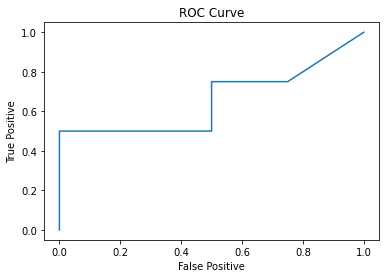

In [38]:
plt.plot(FP_rate,TP_rate)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

### Question-2
##### Task-1

In [39]:
data2=pd.read_csv('EE627A_HW3_DataSet1.csv',header=None)
data2.tail()

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
3995,4.3152,4.3203,4.3152,4.3177,290.45,290.55,290.25,290.45,290.45,290.55,...,22.289,43.479,43.479,43.479,43.479,3.0343,3.0343,3.0343,3.0343,0
3996,4.3126,4.3152,4.3074,4.3100,290.36,290.51,290.18,290.31,290.36,290.51,...,22.319,43.479,43.479,43.479,43.479,3.0343,3.0343,3.0343,3.0343,0
3997,4.3100,4.3152,4.3022,4.3048,290.41,290.41,290.12,290.15,290.41,290.41,...,22.350,43.479,43.554,43.479,43.479,3.0343,3.0343,3.0291,3.0291,0
3998,4.3048,4.3048,4.2790,4.2842,290.18,290.41,290.18,290.27,290.18,290.41,...,22.340,43.479,43.632,43.479,43.632,3.0291,3.0291,3.0240,3.0291,1
3999,4.2764,4.2790,4.2661,4.2764,290.40,290.49,290.29,290.41,290.40,290.49,...,22.350,43.707,43.784,43.632,43.632,3.0343,3.0343,3.0343,3.0343,0


In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
predict=data2.iloc[:,0:476]
response=data2[476]

In [42]:
Logistic_Regression=LogisticRegression(solver='liblinear',C=1.0, random_state=0)
fitting_model=Logistic_Regression.fit(predict,response)

In [43]:
prob_y_pred=fitting_model.predict_proba(predict)[:,1]
prob_y_pred

array([0.89530769, 0.91323699, 0.65207578, ..., 0.33087727, 0.47175371,
       0.65063082])

In [44]:
FalsePositiveRate,TruePositiveRate,_= metrics.roc_curve(response,prob_y_pred)
AUC=metrics.roc_auc_score(response,prob_y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

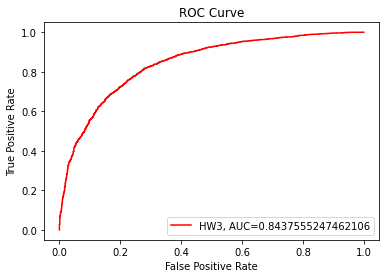

In [45]:
plt.plot(FalsePositiveRate,TruePositiveRate,label='HW3, AUC='+str(AUC),color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show

##### Task-2

In [47]:
# Splitting Data: First 3000 data will be used as Training Purpose and rest of 1000 data will be used as Test Purpose

x_train, x_test, y_train, y_test=train_test_split(data2.iloc[:,0:-1], data2.iloc[:,-1], test_size=0.25,random_state=0,shuffle=False)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(3000, 476)
(1000, 476)
(3000,)
(1000,)


In [48]:
Logistic_Regression2=LogisticRegression(solver='liblinear',C=10.0, random_state=0)
Model2=Logistic_Regression2.fit(x_train,y_train)

In [49]:
prob_y_pred2=Model2.predict_proba(x_train.iloc[:,0:])[:,1]
prob_y_pred2

array([0.99995833, 0.9989204 , 0.90182109, ..., 0.92841773, 0.88061359,
       0.76238846])

In [50]:
FP_Rate_Train,TP_Rate_Train,_ = metrics.roc_curve(y_train,prob_y_pred2)
AUC_Train=metrics.roc_auc_score(y_train,prob_y_pred2)

<function matplotlib.pyplot.show(close=None, block=None)>

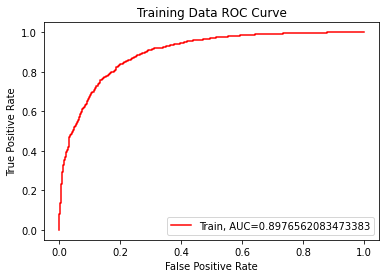

In [51]:
plt.plot(FP_Rate_Train,TP_Rate_Train,label='Train, AUC='+str(AUC_Train),color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data ROC Curve')
plt.legend(loc=4)
plt.show

In [52]:
prob_y_pred3=Model2.predict_proba(x_test.iloc[:,0:])[:,1]

In [53]:
FP_Rate_Test,TP_Rate_Test,_ = metrics.roc_curve(y_test,prob_y_pred3)
AUC_Test=metrics.roc_auc_score(y_test,prob_y_pred3)

<function matplotlib.pyplot.show(close=None, block=None)>

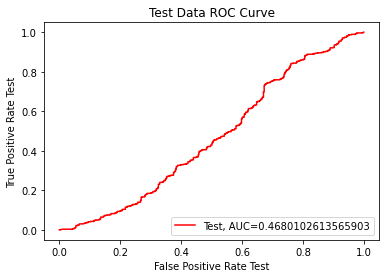

In [54]:
plt.plot(FP_Rate_Test,TP_Rate_Test,label='Test, AUC='+str(AUC_Test),color='r')
plt.xlabel('False Positive Rate Test')
plt.ylabel('True Positive Rate Test')
plt.title('Test Data ROC Curve')
plt.legend(loc=4)
plt.show

Difference Between AUC_Training and AUC_Test= 0.429645946990748


<function matplotlib.pyplot.show(close=None, block=None)>

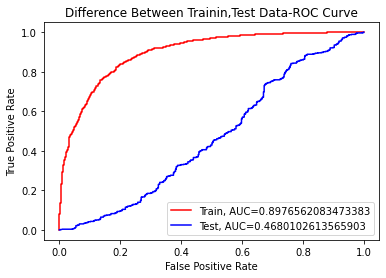

In [55]:
AUC_Difference=AUC_Train-AUC_Test
print('Difference Between AUC_Training and AUC_Test=',AUC_Difference)
plt.plot(FP_Rate_Train,TP_Rate_Train,label='Train, AUC='+str(AUC_Train),color='r')
plt.plot(FP_Rate_Test,TP_Rate_Test,label='Test, AUC='+str(AUC_Test),color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Difference Between Trainin,Test Data-ROC Curve')
plt.legend(loc=4)
plt.show

As we can see above, the difference between AUC_Training-AUC_Test=0.4299 is a high value. Also, AUC_Test is under 0.5, and it means that model is not able to distinguish between Class-1 and Class-2. For these reasons, we can say that model is not good.